<a href="https://colab.research.google.com/github/q-vietle/simulation/blob/main/Frog_star_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import sympy as sp


def recursion(m,p,lambda_):

    # Define parameters of interest
    p_hat = p/(1-p)
    V = np.exp(-lambda_*(1-p_hat)/(m-1))
    phi = np.exp(-(1-p_hat)/m)

    #
    U_list = sp.zeros(m,m)

    for j in range(m): # j = 1, i.e. m = 2
        if j > 0:
            for k in range(j+1): # k = 0,1
                if k < j:
                    U_list[j,k] = scipy.special.binom(j,k)*(phi*V**(k+1))**(j-k)*U_list[k,k]

                elif k == j:
                    g = U_list[k,:]*sp.ones(m,1)
                    U_list[j,k] = 1 - np.array(g)[0][0]

        if j == 0:
            U_list[0,0] = 1

    return U_list[-1,:]
for m in range(2,10):
  print(recursion(m,25/100,5))

Matrix([[0.0255615332065074, 0.974438466793493]])
Matrix([[0.0228734649112389, 0.0484905226209126, 0.928636012467849]])
Matrix([[0.0216373707194931, 0.0182096351898311, 0.0715687845591181, 0.888584209531558]])
Matrix([[0.0209280133319916, 0.0111948199882208, 0.0201419073219320, 0.0941616460648397, 0.853573613293016]])
Matrix([[0.0204680757143505, 0.00836697155921280, 0.00948279075883566, 0.0239232366819741, 0.115908002582144, 0.821850922703483]])
Matrix([[0.0201457505275776, 0.00689222899644053, 0.00575890086241676, 0.00960269129395618, 0.0286961429986230, 0.136586102942053, 0.792318182378933]])
Matrix([[0.0199073420777337, 0.00600119851824471, 0.00404020147319699, 0.00501379823059958, 0.0104703243773623, 0.0341483806540400, 0.156064422426710, 0.764354332242113]])
Matrix([[0.0197238655753690, 0.00540946209477213, 0.00310014791157821, 0.00308476384003009, 0.00490626360393710, 0.0117800883492774, 0.0401100375580322, 0.174273796268208, 0.737611574798796]])


In [ ]:


import numpy as np
import scipy.special
import mpmath
mpmath.mp.dps = 50

def P(m, p, lambda_):
    p_hat = p / (1 - p)
    V = np.exp(-lambda_ * (1 - p_hat) / (m - 1))
    phi = np.exp(-(1 - p_hat) / m)

    U_list = np.zeros((m, m))

    U_list[0, 0] = 1

    for j in range(1, m):
        for k in range(j):
            U_list[j, k] = scipy.special.binom(j, k) * (phi * V**(k + 1))**(j - k) * U_list[k, k]

        g = U_list[j, :j]
        U_list[j, j] = 1 - np.sum(g)

    return U_list[-1, :]
for m in range(2,10):
  print(P(m,25/100,5))

def f(m,p,lambda_):

    p_til = p*(m-1)/(m-(m+1)*p)
    p_hat = p/(1-p)
    sum = 0

    for i in range(len(P(m,p,lambda_))):
        sum += np.exp((1-p_hat*(1+i))*lambda_)*P(m,p,lambda_)[i]
    return np.exp(-p_til)*sum

[0.02556153 0.97443847]
[0.02287346 0.04849052 0.92863601]
[0.02163737 0.01820964 0.07156878 0.88858421]
[0.02092801 0.01119482 0.02014191 0.09416165 0.85357361]
[0.02046808 0.00836697 0.00948279 0.02392324 0.115908   0.82185092]
[0.02014575 0.00689223 0.0057589  0.00960269 0.02869614 0.1365861
 0.79231818]
[0.01990734 0.0060012  0.0040402  0.0050138  0.01047032 0.03414838
 0.15606442 0.76435433]
[0.01972387 0.00540946 0.00310015 0.00308476 0.00490626 0.01178009
 0.04011004 0.1742738  0.73761157]


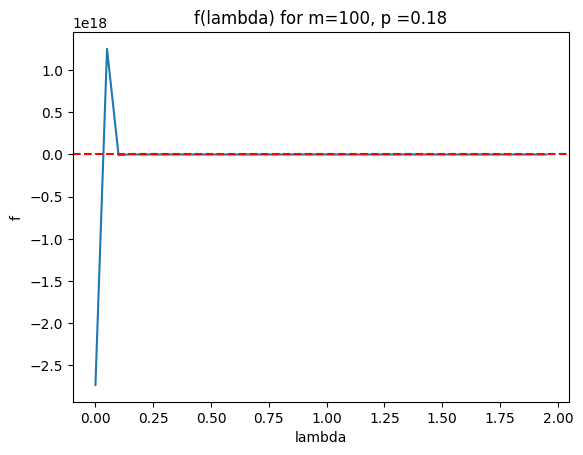

In [ ]:
m = 100
p = 0.18


lambda_vals = np.arange(0,2,0.05)

f_vals = [f(m, p, lambda_) for lambda_ in lambda_vals]

# Plot the function
plt.plot(lambda_vals, f_vals)
plt.axhline(y=1, color='red', linestyle='--')

plt.title(f"f(lambda) for m={m}, p ={p}")

plt.xlabel('lambda')
plt.ylabel('f')
plt.show()